In [1]:
import random
from wand.image import Image as WImage
import numpy as np
import matplotlib.pyplot as plt


from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 10

## Сортировка деревом (Tree sort)

Другие названия: 

- Cортировка двоичным деревом

- Cортировка деревом

- Древесная сортировка

- Сортировка с помощью бинарного дерева

### Классификация алгоритма:

- По типу алгоритма: внешняя сортировка

- По устойчивости: Зависит от реализации (реализация представленная ниже является устойчивой)

- По месту хранения данных: Оперативное запоминающее устройство

- По выделению дополнительного пространства: требуется не менее чем $4n$ ячеек дополнительной памяти, но существуют способы уменьшение требуемой памяти

- По дополнительным затратам памяти: $O(n)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n \times log(n))$
  
  - В среднем: $O(n \times log(n))$

### Описание алгоритма:

Сортировка деревом - алгоритм сортироовки, создающий дерево бинарного поиска из сортируемых элементов. Затем происходит проход по дереву в необходимом порядке, чтобы вернуть элементы в отсортированном порядке.

Двоичным(бинарным) деревом назовем упорядоченную структуру данных, 
в которой каждому элементу - предшественнику или корню (под)дерева - 
поставлены в соответствие по крайней мере два других элемента (преемника).

Причем для каждого предшественника выполнено следующее правило: 
левый преемник всегда меньше, а правый преемник всегда больше или равен
предшественнику. 

После создания дерева необходимо обойти его в $InOorderTraversal$
 — обход узлов в отсортированном порядке

### Блок-схемы алгоритма

<img src='./src/scheme2.jpg'> Создание бинарного дерева </img>

<img src='./src/scheme1.jpg'> Проход по дереву в отсортированном порядке  </img>

### Псевдокод алгоритма


```c
template <typename T>
class Node{
    Node(T value_){
        T value = value_;
        Node* left_node = nullptr;
        Node* right_node = nullptr;
    }
}

void insert(Node* root, Node* node){
    if(root == nullptr){
        root = node;
    }
    else{
        if(root.value <= node.value){
            if(root.right_node == nullptr){
                root.right_node = node;
            } else{
                insert(root.right_node, node);
            }
        }
        else{
            if(root.left_node == nullptr){
                root.left_node = node;
            } 
            else {
                insert(root.left_node, node);
            }
        }
    }
}

template<typename T>
void in_order_traversal(Node* root, array result){
    if (root != nullptr){
        in_order_traversal(root.left, result);
        result.push(root.value);
        in_order_traversal(root.right, result);
    }
}

array tree_sort(array arr){
    Node root = Node(arr[0]);
    for i in range(1, len(arr)){
        insert(root, Node(arr[i]));
    }
    array result;
    in_order_traversal(root, result);
    return result
}

```

### Реализация алгоритма

- Достоинства алгоритма:
    
    - Основным преимуществом алгоритма сортировки двоичным деревом является то, что мы легко можем вносить изменения, как в связанном списке.
    - Сортировка двоичным деревом происходит так же быстро, как алгоритм быстрой сортировки.
    
- Недостатки:

    - Худший случай сортировки – когда все элементы массива уже отсортированы.
    - В худшем случае, время работы алгоритма равно $O(n^2)$
    - Требует большого выделения памяти

In [2]:
class Node:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value

def insert(root, node):
    if root is None:
        root = node
    else:
        if root.value <= node.value:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

def in_order_traversal(root, result):
    if root:
        in_order_traversal(root.left, result)
        result.append(root.value)
        in_order_traversal(root.right, result)

def tree_sort(arr):
    root = Node(arr[0])
    for i in range(1, len(arr)):
        insert(root, Node(arr[i]))
    result = []
    in_order_traversal(root, result)
    return result

# НЕ является частью алгоритма, функция необходима только для дальнейшей визуализации его работы
def printTree(node, level=0):
    if node != None:
        printTree(node.left, level + 1)
        # print('----------------------------------------------------------------------------')
        print(' ' * 6 * level + '-> ' + str(node.value))
        printTree(node.right, level + 1)

### Тестирование программы

In [3]:
assert tree_sort([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert tree_sort([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert tree_sort([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert tree_sort([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [4]:
def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))

#### Тестирование на 500 (Все)

In [5]:
n0 = 500
x0_sort = get_sort_array(n0)
x0_reverse = get_reverse_array(n0)
x0_random = get_random_array(n0)

In [6]:
%%time

tree_sort(list(x0_sort))
pass

CPU times: total: 31.2 ms
Wall time: 32 ms


In [7]:
%%time

tree_sort(list(x0_reverse))
pass

CPU times: total: 15.6 ms
Wall time: 33 ms


In [8]:
%%time

tree_sort(list(x0_random))
pass

CPU times: total: 0 ns
Wall time: 2 ms


#### Тестирование на 1000 (Все)

In [9]:
n1 = 1000
x1_sort = get_sort_array(n1)
x1_reverse = get_reverse_array(n1)
x1_random = get_random_array(n1)

In [10]:
%%time

tree_sort(list(x1_sort))
pass

CPU times: total: 141 ms
Wall time: 153 ms


In [11]:
%%time

tree_sort(list(x1_reverse))
pass

CPU times: total: 109 ms
Wall time: 127 ms


In [12]:
%%time

tree_sort(list(x1_random))
pass

CPU times: total: 0 ns
Wall time: 4 ms


#### Тестирование на 2500 (Все)

In [13]:
n1_5 = 2500
x1_5_sort = get_sort_array(n1_5)
x1_5_reverse = get_reverse_array(n1_5)
x1_5_random = get_random_array(n1_5)

In [14]:
%%time

tree_sort(list(x1_5_sort))
pass

CPU times: total: 766 ms
Wall time: 820 ms


In [15]:
%%time

tree_sort(list(x1_5_reverse))
pass

CPU times: total: 781 ms
Wall time: 778 ms


In [16]:
%%time

tree_sort(list(x1_5_random))
pass

CPU times: total: 15.6 ms
Wall time: 12 ms


#### Тестирование на 5000 (Случайный массив)

In [17]:
x2_random = get_random_array(5000)

In [18]:
%%time

tree_sort(list(x2_random))
pass

CPU times: total: 31.2 ms
Wall time: 23 ms


#### Тестирование на 10000 (Случайный массив)

In [19]:
%%time

tree_sort(list(get_random_array(10000)))
pass

CPU times: total: 46.9 ms
Wall time: 55 ms


#### Тестирование на 100000 (Случайный массив)

In [20]:
%%time

tree_sort(list(get_random_array(100000)))
pass

CPU times: total: 906 ms
Wall time: 914 ms


#### Тестирование на 1000000 (Случайный массив)

In [21]:
%%time

tree_sort(list(get_random_array(1000000)))
pass

CPU times: total: 13.4 s
Wall time: 13.4 s


### Пример построения дерева

In [22]:
list_ = [5, 2, 1, 5, 4, 0, 9, 6, 7, 8, 7]

root = Node(list_[0])
for i in range(1, len(list_)):
    insert(root, Node(list_[i]))
    printTree(root)
    print('='*50)

      -> 2
-> 5
            -> 1
      -> 2
-> 5
            -> 1
      -> 2
-> 5
      -> 5
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
            -> 9
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 6
            -> 9
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 6
                        -> 7
            -> 9
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 6
                        -> 7
                              -> 8
            -> 9
                  -> 0
            -> 1
      -> 2
            -> 4
-> 5
      -> 5
                  -> 6
                        -> 7
                                    -> 7
                   

### Построение графиков зависимости от времени

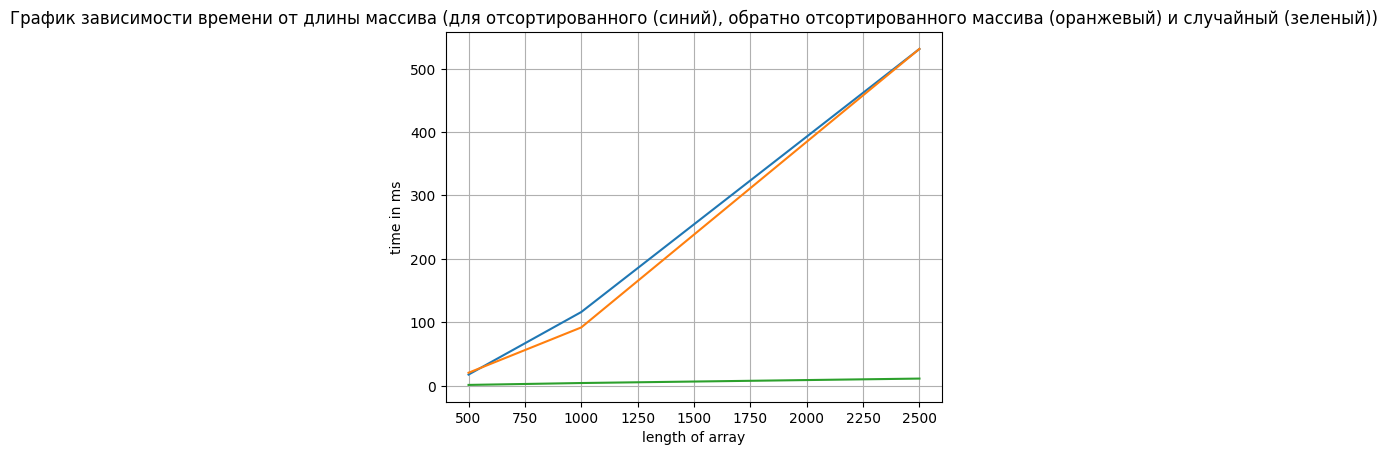

In [23]:
x = np.array([500, 1000, 2500])
y1 = np.array([17.3, 116, 531])
y2 = np.array([20.2, 91.7, 531])
y3 = np.array([1, 4, 11])
plt.plot(x, y1) # Синий график - отсортированный массив
plt.plot(x, y2) # Оранжевый график - обратно отсортированный массив
plt.plot(x, y3) # Зеленый график - случайно-сгенерированный массив
plt.title('График зависимости времени от длины массива (для отсортированного (синий), обратно отсортированного массива (оранжевый) и случайный (зеленый))')
plt.xlabel('length of array')
plt.ylabel('time in ms')
plt.grid()
plt.show()

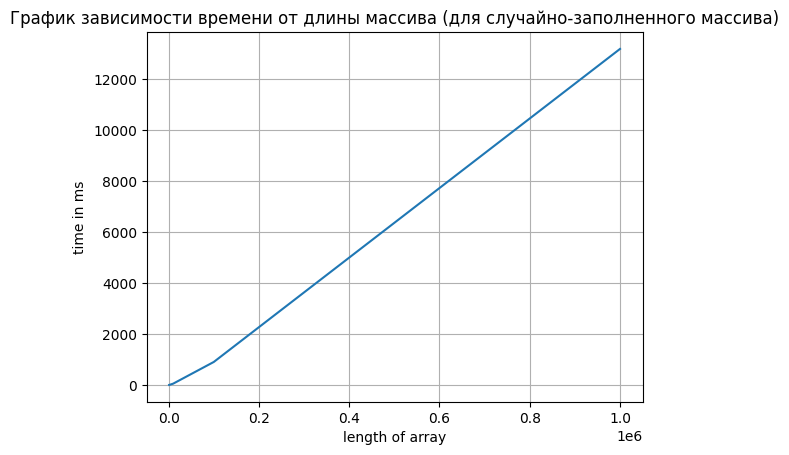

In [24]:
x = np.array([1000, 2500, 5000, 10000, 100000, 1000000])
y = np.array([4, 11, 25, 54, 906, 13200])
plt.plot(x,y)
plt.title('График зависимости времени от длины массива (для случайно-заполненного массива)')
plt.xlabel('length of array')
plt.ylabel('time in ms')
plt.grid()
plt.show()

### Литература

- https://shpargalum.ru/shpora-gos-povtas/strukturyi-i-algoritmyi-obrabotki-dannyix/sort-tree.html

- http://algolist.ru/sort/faq/q7.php

- https://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8

- https://en.wikipedia.org/wiki/Tree_sort